## Twitter - Pressemitteilung Vergleich

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from tqdm import tqdm # Fortschrittsanzeige für pandas
from datetime import datetime
tqdm.pandas()

In [4]:
tweets_csv = '../mod_data/copbird_table_tweet_ext_state.csv'
users_csv = '../mod_data/copbird_table_user_ext.csv'

In [5]:
limit = None
tweets = pd.read_csv(tweets_csv, nrows=limit)
users = pd.read_csv(users_csv, nrows=limit)

In [6]:
users.head()

user_id                           name           handle  \
0  1032561433102434304               Polizei Wittlich  PolizeiWittlich   
1  1143867545226764293  Bayerisches Landeskriminalamt       LKA_Bayern   
2  1169206134189830145                Polizei Stendal      Polizei_SDL   
3  1184024283342950401             Polizei Ravensburg        PolizeiRV   
4  1232548941889228808           Polizei Bad Nenndorf     Polizei_BadN   

          stadt         bundesland  
0      Wittlich    Rheinland-Pfalz  
1       München             Bayern  
2       Stendal     Sachsen-Anhalt  
3    Ravensburg  Baden-Württemberg  
4  Bad Nenndorf      Niedersachsen

In [7]:
tweets.head()

tweet_id                                         tweet_text  \
0  1321021123463663616  @mahanna196 Da die Stadt keine Ausnahme für Ra...   
1  1321023114071969792  #Zeugengesucht\r\nDie Hintergründe zu dem Tötu...   
2  1321025127388188673  RT @bka: EUROPE´S MOST WANTED – Sexualstraftät...   
3  1321028108665950208  @StrupeitVolker Wir verstehen nicht so recht w...   
4  1321029199998656513  Wir unterstützen das @bka bei der #Öffentlichk...   

            created_at             user_id                       user_name  \
0  2020-10-27 09:29:13  778895426007203840  Polizei Oldenburg-Stadt/Ammerl   
1  2020-10-27 09:37:08          2397974054                  Polizei Berlin   
2  2020-10-27 09:45:08          2397974054                  Polizei Berlin   
3  2020-10-27 09:56:59          2810902381                 Polizei München   
4  2020-10-27 10:01:19           223758384                 Polizei Sachsen   

            handle    stadt bundesland  
0       Polizei_OL      NaN        NaN  
1    polizeiberlin   Berlin     Berlin  
2    polizeiberlin   Berlin     Berlin  
3  PolizeiMuenchen  München     Bayern  
4   PolizeiSachsen  Dresden    Sachsen

Selektiere Tweets mit PM-Links

In [8]:
def has_pm_link(txt):
    return "https://t.co/" in txt

In [9]:
tweets['has_pm'] = tweets['tweet_text'].apply(lambda x: has_pm_link(x))

In [10]:
tweets.head()

tweet_id                                         tweet_text  \
0  1321021123463663616  @mahanna196 Da die Stadt keine Ausnahme für Ra...   
1  1321023114071969792  #Zeugengesucht\r\nDie Hintergründe zu dem Tötu...   
2  1321025127388188673  RT @bka: EUROPE´S MOST WANTED – Sexualstraftät...   
3  1321028108665950208  @StrupeitVolker Wir verstehen nicht so recht w...   
4  1321029199998656513  Wir unterstützen das @bka bei der #Öffentlichk...   

            created_at             user_id                       user_name  \
0  2020-10-27 09:29:13  778895426007203840  Polizei Oldenburg-Stadt/Ammerl   
1  2020-10-27 09:37:08          2397974054                  Polizei Berlin   
2  2020-10-27 09:45:08          2397974054                  Polizei Berlin   
3  2020-10-27 09:56:59          2810902381                 Polizei München   
4  2020-10-27 10:01:19           223758384                 Polizei Sachsen   

            handle    stadt bundesland  has_pm  
0       Polizei_OL      NaN        NaN   False  
1    polizeiberlin   Berlin     Berlin    True  
2    polizeiberlin   Berlin     Berlin    True  
3  PolizeiMuenchen  München     Bayern   False  
4   PolizeiSachsen  Dresden    Sachsen    True

Erzeuge einen gesamten DataFrame

In [12]:
tweets_with_pm = tweets.loc[tweets['has_pm'] == True]
tweets_without_pm = tweets.loc[tweets['has_pm'] == False]

In [13]:
tweets_with_pm_count = tweets_with_pm.groupby('bundesland').size().reset_index(name='count').sort_values(by='count', ascending=False)
tweets_without_pm_count = tweets_without_pm.groupby('bundesland').size().reset_index(name='count').sort_values(by='count', ascending=False)

In [14]:
tweets_with_pm_count['pm'] = tweets_with_pm_count['count'].apply(lambda x: 'mit PM')
tweets_without_pm_count['pm'] = tweets_with_pm_count['count'].apply(lambda x: 'ohne PM')

In [15]:
result = pd.concat([tweets_with_pm_count, tweets_without_pm_count])

In [16]:
result.head()

bundesland  count      pm
10  Nordrhein-Westfalen   9242  mit PM
9         Niedersachsen   2773  mit PM
1     Baden-Württemberg   2759  mit PM
2                Bayern   2264  mit PM
7                Hessen   1737  mit PM

Visualisiere die Ergebnisse

[]

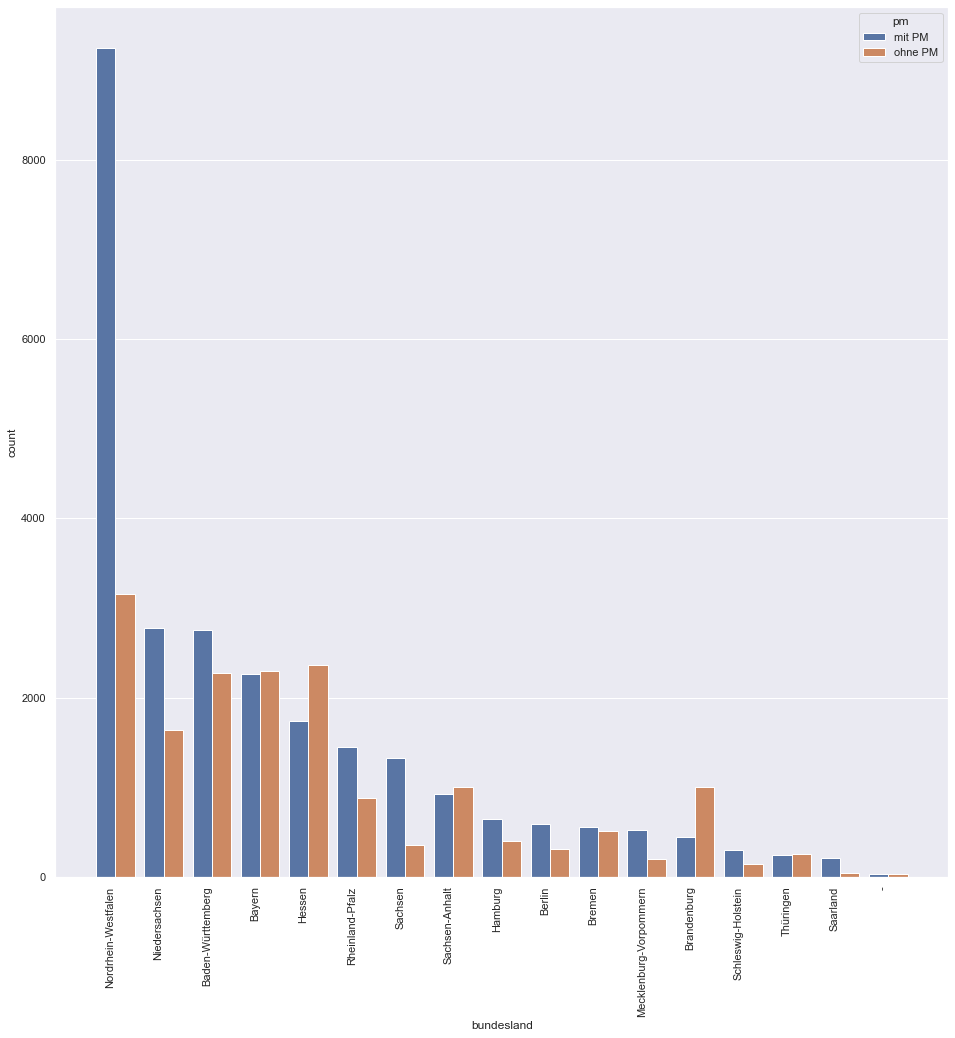

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 16))
g = sns.barplot(x="bundesland", y="count", hue="pm", data=result, ci=None)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')
plt.plot()